In [13]:
############################################################################
# OpenEnsemble Project													   #
# Testing the mixture model for the  dataset.                          #
############################################################################
#comment this to suppress showing in notebooks
%matplotlib inline 


import numpy as np 
import pandas as pd 
#import mixture_model
#import utilities
#import fitnessmetric

import matplotlib.pyplot as plt
from sklearn import datasets
import openensembles as oe
import sklearn.cluster as skc



## Generate Half Rings points.
halfRings = []
while(True):
    x = np.random.normal(0,20)
    y = np.random.normal(0,20)
    z = np.random.normal(0,20)
    if ((x ** 2 + y ** 2) >= 0.5) and ((x ** 2 + y ** 2) <= 1):
        halfRings.append(list([x,y]))
    elif ((x ** 2 + y ** 2) >= 10) and ((x ** 2 + y ** 2) <= 11):
        halfRings.append(list([x,y]))
        
    if len(halfRings) == 400:
        break

halfRings = np.asarray(halfRings)
df = pd.DataFrame(halfRings)
#create an open ensembles data object from the dataframe
dataObj = oe.data(df, [1,2])



In [14]:
dataObj.D['parent'].shape[0] #size of data

400

In [15]:
c = oe.cluster(dataObj) #instantiate a clustering object
c.algorithms_available() #print the algorithms available.

{'DBSCAN': '', 'agglomerative': '', 'kmeans': '', 'spectral': ''}

In [16]:
##################################################
# Part I: Ensemble clustering                    #
##################################################

# Apply transformations
dataObj.transform('parent', 'zscore', 'zscore')
dataObj.transform('parent', 'log', 'log', base=2,Keep_NaN=0, Keep_Inf=0)

# for every transform appled, every K chosen, and every algorithm selected, cluster the data
c = oe.cluster(dataObj)
K = [2,3,4,6,8]
algorithms = ['spectral', 'kmeans', 'agglomerative']
for k in K:
    for algorithm in algorithms:
        for transform in list(dataObj.D.keys()):
            name = "%s_%d_%s"%(algorithm, k, transform)
            c.cluster(transform, algorithm, name, K=k)





/Users/knaegle/GIT/openensembles.main/openensembles.py:153: UserWarning: WARNING: transformation log resulted in 402 NaN values
  warnings.warn("WARNING: transformation %s resulted in %d NaN values"%(txfm_fcn, numNaNs), UserWarning)
/Users/knaegle/GIT/openensembles.main/openensembles.py:239: UserWarning: Number of unique clusters returned does not match number requested
  warnings.warn('Number of unique clusters returned does not match number requested', UserWarning)


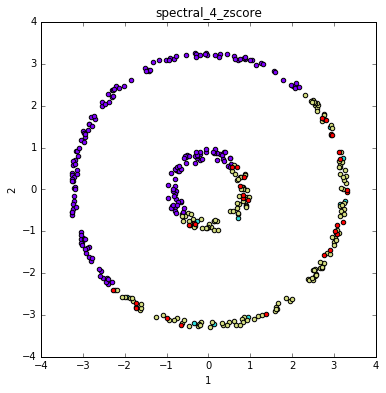

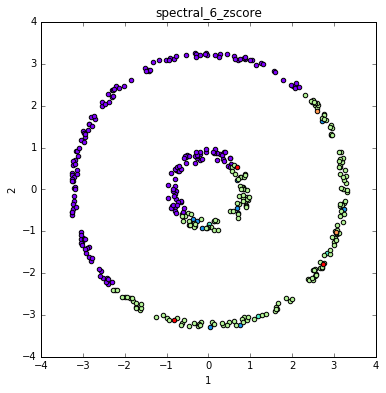

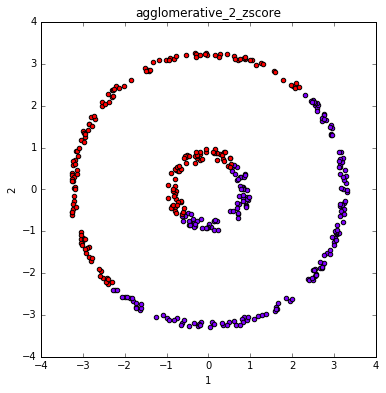

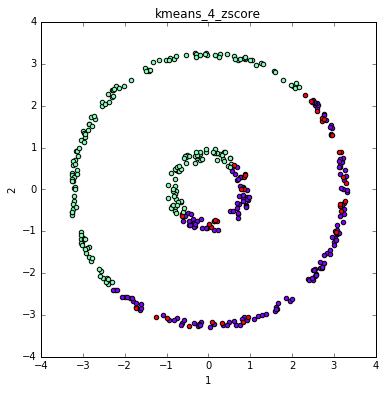

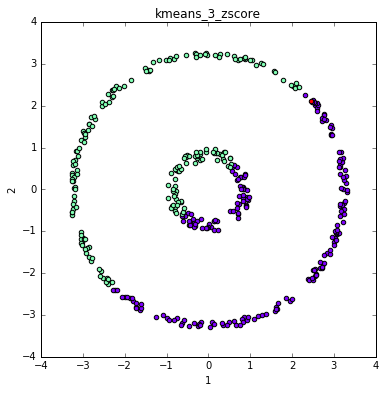

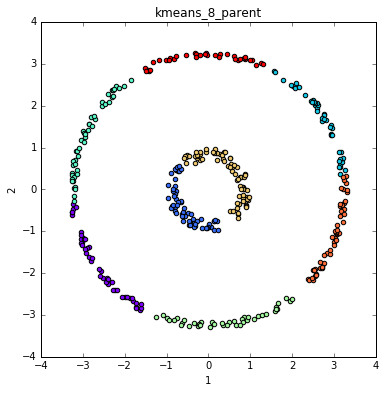

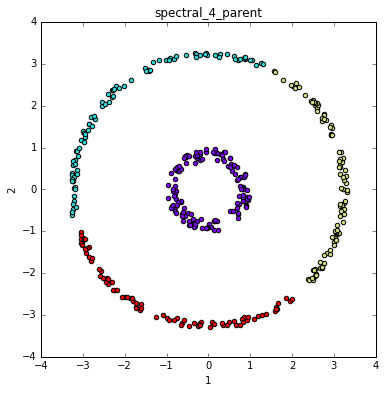

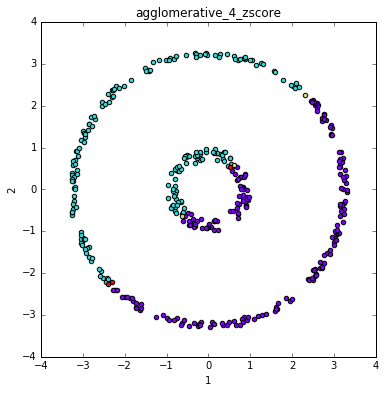

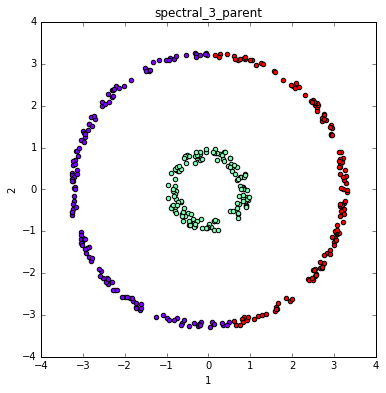

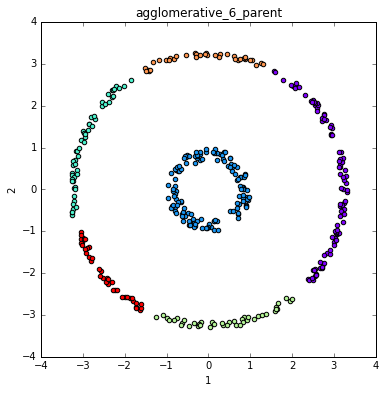

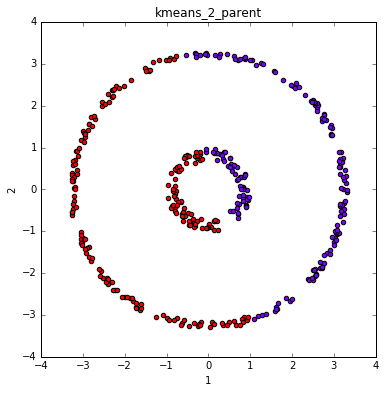

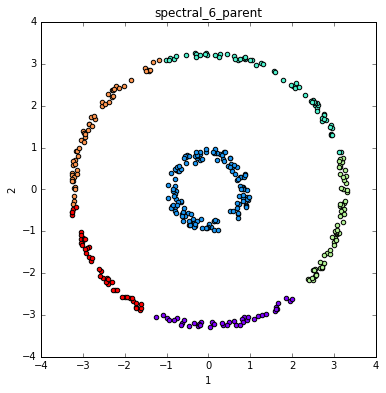

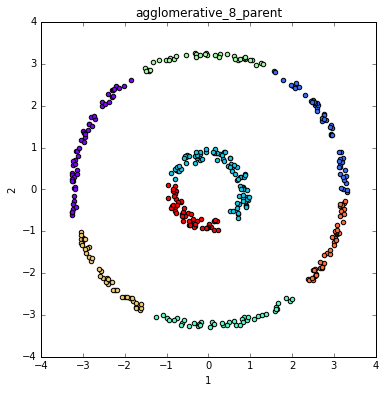

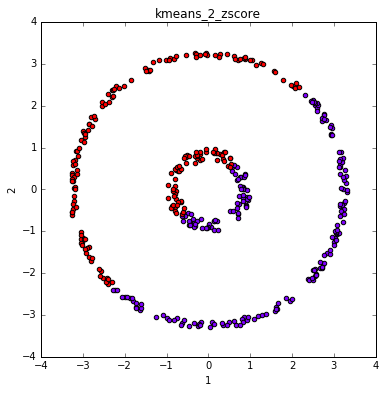

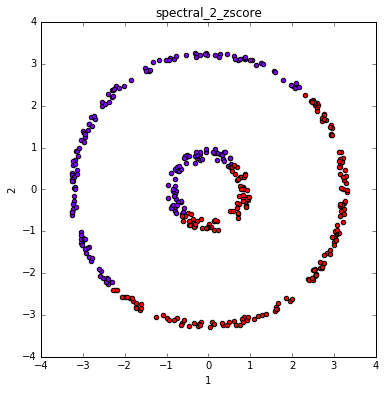

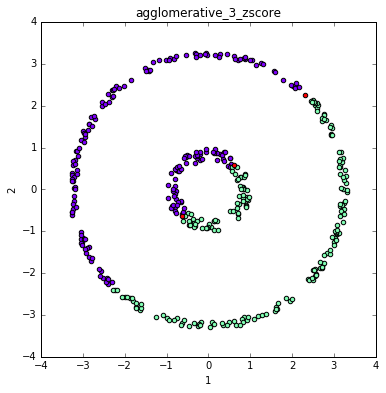

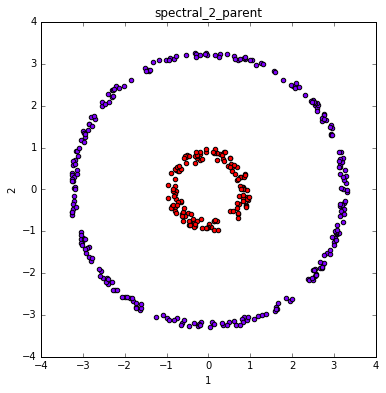

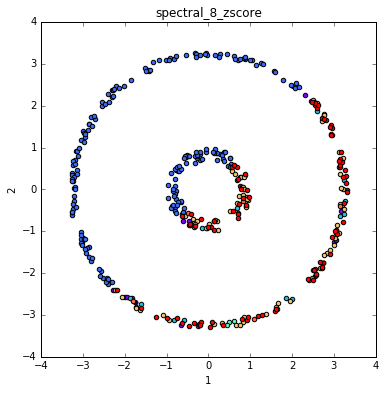

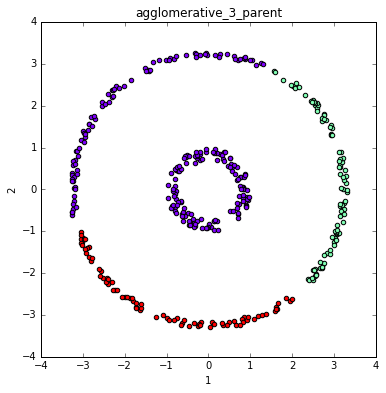

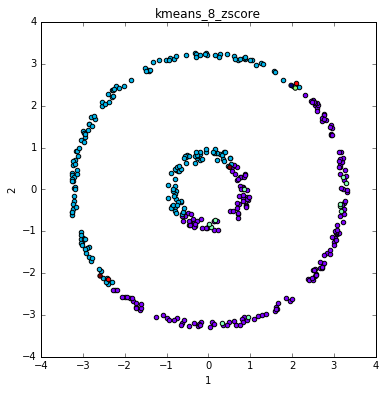

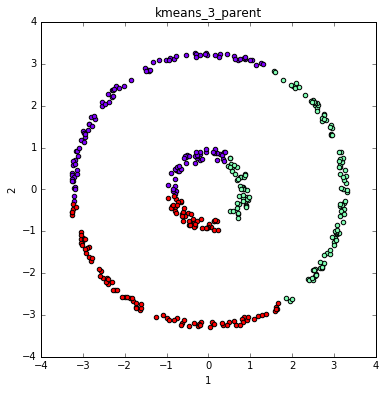

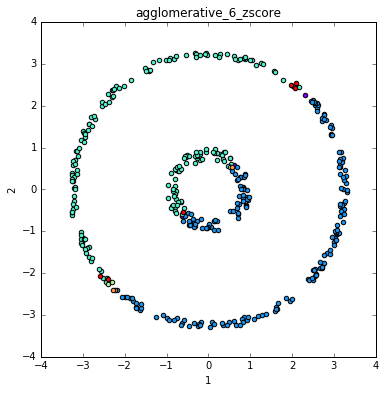

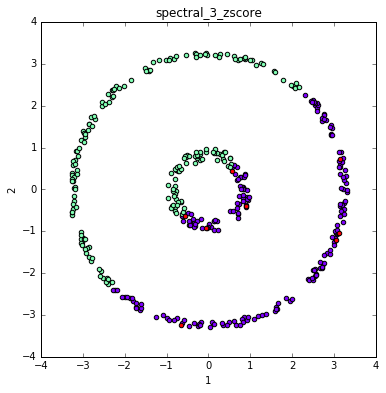

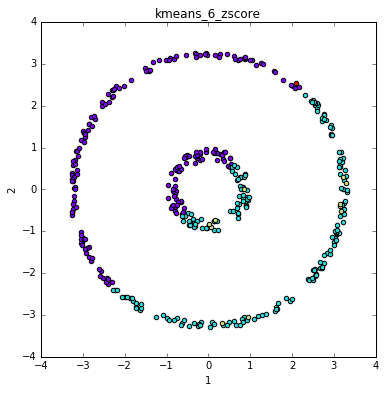

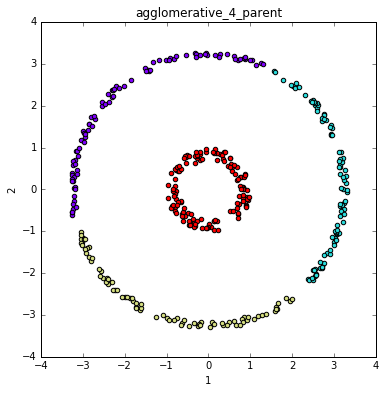

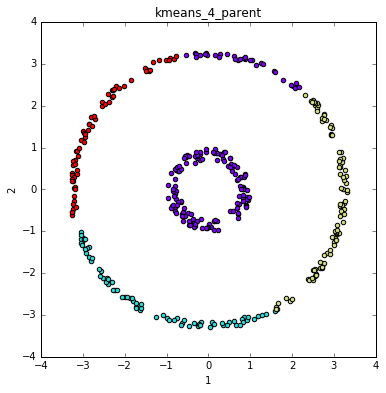

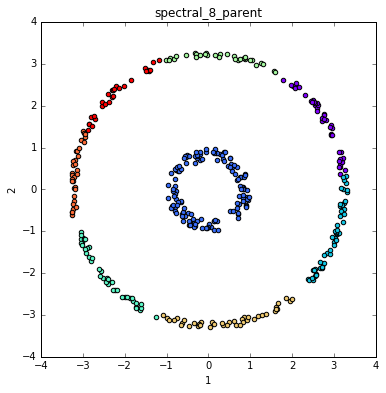

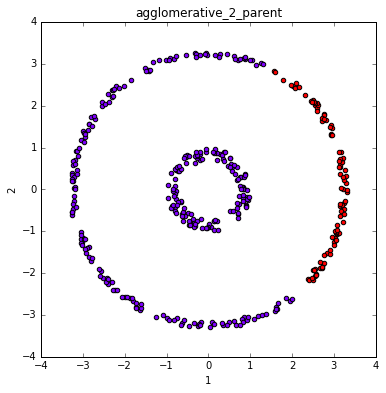

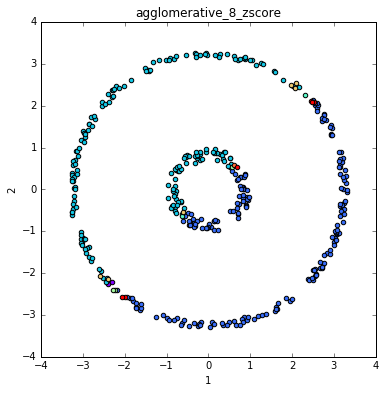

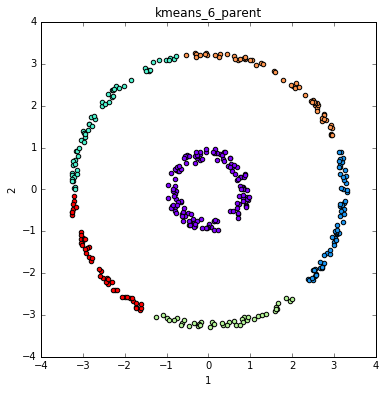

In [17]:
## Plot individual clustering solutions in the ensemble clustering object

fignum = 1
fig = {}
for solution in c.labels:
    labels = c.labels[solution]
    fig[solution] = dataObj.plot_data('parent', fignum=fignum, title=solution, class_labels=labels)
    fignum += 1


## Finish the ensemble using different approaches

In [18]:
##################################################
# Ensemble Finishing By Mixture Model            #
##################################################

c_MM = c.mixture_model(K=2)




/Users/knaegle/GIT/openensembles.main/finishing.py:64: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'NaN' in np.unique(self.y.iloc[:,i].values):


In [19]:
##################################################
# Ensemble Finishing By Graph Partitioning       #
##################################################
c_g = c.finish_graph_closure(0.7, clique_size=3)


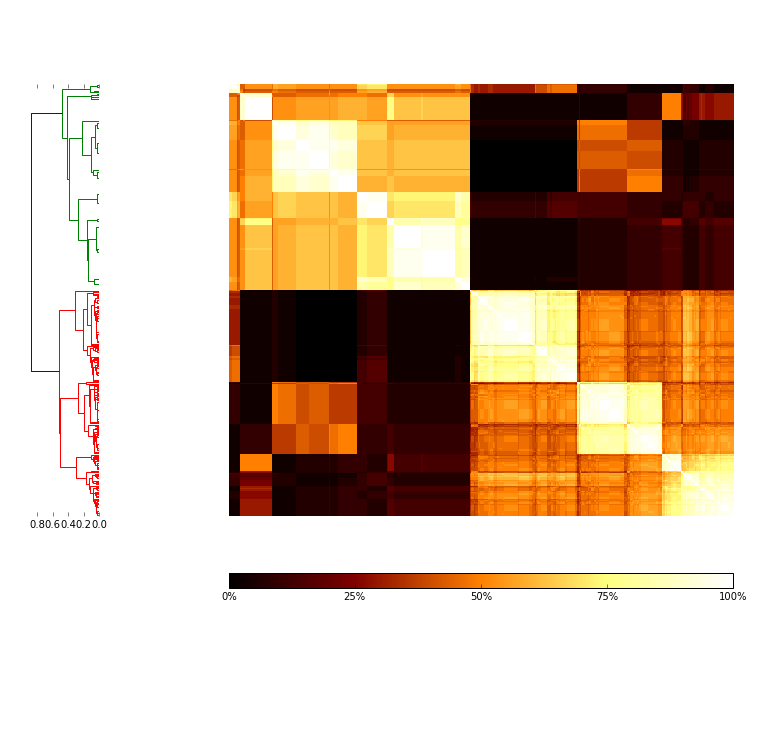

In [20]:
##########################################################
# Ensemble Finishing By Linking The Co-occurrence matrix #
##########################################################
#plot the co-occurrence matrix, not necessary, but for visualization

coMat = c.co_occurrence_matrix('parent')
threshold = coMat.avg_dist
coMat.plot()
c_linkage = c.finish_co_occ_linkage(threshold, linkage='average')

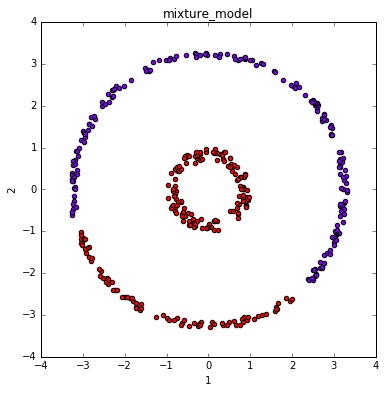

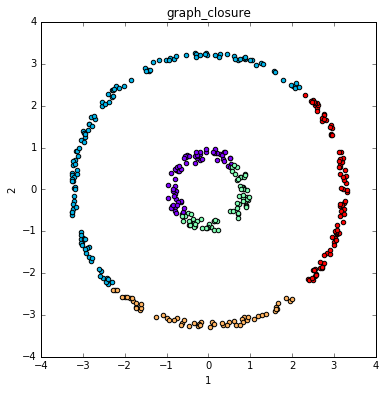

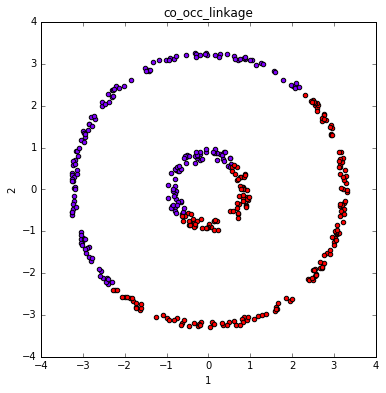

In [21]:
labels = c_MM.labels['mixture_model']
f = dataObj.plot_data('parent', title='mixture_model', class_labels=labels)

labels = c_g.labels['graph_closure']
f = dataObj.plot_data('parent', title='graph_closure', class_labels=labels)


labels = c_linkage.labels['co_occ_linkage']
f = dataObj.plot_data('parent', title='co_occ_linkage', class_labels=labels)

# Validation Metric: Comparison of Solutions

In [22]:
## 
v = oe.validation(dataObj, c)
#calculate the validation on parent data
source_name = 'parent'
validation_name= 'det_ratio' #determinant ratio is a measure of connectedness
for solution in c.labels:
    v.calculate(validation_name, solution, source_name)

v_mm = oe.validation(dataObj,c_MM)
v_mm.calculate(validation_name, 'mixture_model', 'parent')


/Users/knaegle/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [23]:
# Print the results
for val in v.validation:
    print("%s\t%1.3f"%(v.cluster_name[val], v.validation[val]))
for val in v_mm.validation:
    print("%s\t%1.3f"%(v_mm.cluster_name[val], v_mm.validation[val]))

kmeans_3_parent	5.606
agglomerative_6_zscore	3.205
agglomerative_8_parent	111.829
spectral_3_zscore	2.948
spectral_2_parent	1.001
agglomerative_6_parent	40.288
agglomerative_3_zscore	2.994
kmeans_4_parent	11.086
spectral_3_parent	4.986
agglomerative_4_zscore	3.055
kmeans_2_parent	3.209
spectral_8_parent	117.480
spectral_2_zscore	2.946
spectral_6_parent	42.702
kmeans_4_zscore	2.978
agglomerative_4_parent	9.428
spectral_8_zscore	3.084
kmeans_6_parent	44.906
agglomerative_2_parent	2.447
spectral_6_zscore	2.987
agglomerative_2_zscore	2.946
kmeans_3_zscore	2.976
kmeans_8_parent	119.546
spectral_4_zscore	2.961
agglomerative_8_zscore	3.284
kmeans_6_zscore	2.988
kmeans_8_zscore	3.029
kmeans_2_zscore	2.946
agglomerative_3_parent	5.094
spectral_4_parent	9.428
mixture_model	1.540
